In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.pyplot


UsageError: Line magic function `%matplotlib.pyplot` not found.


In [8]:
df = pd.read_csv('winequality-red.csv')

In [9]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.shape

(1599, 12)

In [15]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

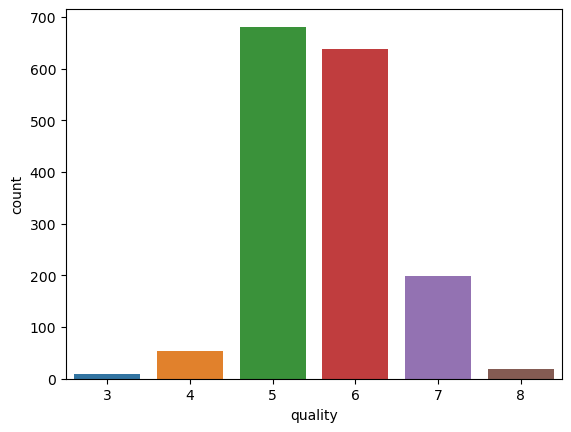

In [18]:
sns.countplot('quality',data=df)

In [19]:
X=df.drop(columns='quality',axis=1)

In [25]:
X.columns.value_counts()

fixed acidity           1
volatile acidity        1
citric acid             1
residual sugar          1
chlorides               1
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               1
alcohol                 1
dtype: int64

In [51]:
Y=df['quality'].apply(lambda x : 1 if x>=7 else 0)
df['quality']= Y

In [30]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier()

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
X_test.shape,X_train.shape,Y_train.shape,Y_test.shape

((320, 11), (1279, 11), (1279,), (320,))

In [40]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [42]:
pred_train = rf.predict(X_train)

In [43]:
print(accuracy_score(pred_train,Y_train))

1.0


In [44]:
pred_test = rf.predict(X_test)

In [45]:
print(accuracy_score(pred_test,Y_test))

0.91875


In [46]:
print(classification_report(pred_test,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       287
           1       0.59      0.73      0.65        33

    accuracy                           0.92       320
   macro avg       0.78      0.83      0.80       320
weighted avg       0.93      0.92      0.92       320



In [47]:
print(confusion_matrix(pred_test,Y_test))

[[270  17]
 [  9  24]]


In [63]:
input_array =(8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5)
np_arr = np.asarray(input_array).reshape(1,-1)
np_arr

array([[8.500e+00, 2.800e-01, 5.600e-01, 1.800e+00, 9.200e-02, 3.500e+01,
        1.030e+02, 9.969e-01, 3.300e+00, 7.500e-01, 1.050e+01]])

In [64]:
pred_input = rf.predict(np_arr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [65]:
pred_input

array([1], dtype=int64)

In [74]:
if pred_input==1:
    print(pred_input)
    print('Wine is good')
else:
    print(pred_input)
    print('Wine is not good')

[1]
Wine is good
